In [1]:
# Mounting the google drive where we have stored our dataset.
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# importing the required packages
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar100
from keras.layers import LeakyReLU
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import Tensor
from tensorflow.keras.layers import Input, Conv2D, ReLU,LeakyReLU, BatchNormalization,\
                                    Add, AveragePooling2D, Flatten, Dense, Dropout,ZeroPadding2D,MaxPool2D,concatenate
from tensorflow.keras.models import Model
from keras.initializers import glorot_uniform
from tensorflow.keras.optimizers import Adam,SGD

In [3]:
# importing the required packages
import cv2     # for capturing videos
import math   # for mathematical operations
import matplotlib.pyplot as plt    # for plotting the images
%matplotlib inline
import pandas as pd
from keras.preprocessing import image   # for preprocessing the images
import numpy as np    # for mathematical operations
from keras.utils import np_utils
from skimage.transform import resize   # for resizing images
from sklearn.model_selection import train_test_split
from glob import glob
from tqdm import tqdm
from google.colab import drive
import os
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.preprocessing import image as Img
from keras.models import Model, load_model
from keras.layers import Input
import tensorflow as tf

In [4]:
# importing the required packages
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar100
from keras.layers import LeakyReLU
from keras import backend as K
from keras.layers import ELU
from keras.preprocessing.image import ImageDataGenerator

In [5]:
# importing the Inception V3 pre-trained model for transfer learning 
base_model = InceptionV3(
    weights='imagenet',
    include_top=True
)
# We'll extract features at the final pool layer.
model = Model(
    inputs=base_model.input,
    outputs=base_model.get_layer('avg_pool').output
)

96116736/96112376 [==============================] - 0s 0us/step


In [5]:
os.chdir('/content/gdrive/MyDrive/UCF-101')
label_list=os.listdir()
label_list.sort()
label_list
x = [0,19,34,42,94,69,74,90,88,93,5,38,58,2,8,16,18,28,40,67,86,43,26,48]
label_list_25 = []
for ele in x:
  label_list_25.append(label_list[ele])

In [6]:
label_list_25  #list of video categories used in our project

['ApplyEyeMakeup',
 'BrushingTeeth',
 'HammerThrow',
 'HulaHoop',
 'Typing',
 'PullUps',
 'RopeClimbing',
 'TaiChi',
 'Swing',
 'TrampolineJumping',
 'BandMarching',
 'HeadMassage',
 'PlayingCello',
 'Archery',
 'BasketballDunk',
 'BoxingPunchingBag',
 'BreastStroke',
 'FieldHockeyPenalty',
 'HorseRace',
 'PoleVault',
 'SumoWrestling',
 'IceDancing',
 'Drumming',
 'Kayaking']

In [ ]:
# extracting features of 25 selected video categories.

os.chdir('/content/gdrive/MyDrive/UCF-101')
os.getcwd().split('/')[-1]
label_list=os.listdir()
label_list.sort()
label_list
x = [0,19,34,42,94,69,74,90,88,93,5,38,58,2,8,16,18,28,40,67,86,43,26,48]
label_list_25 = []
for ele in x:
  label_list_25.append(label_list[ele])
Xtrain=np.load("x_train_data_25.npy")
Ytrain=np.load("y_train_data_25.npy")
Xtest=np.load("x_test_data_25.npy")
Ytest=np.load("y_test_data_25.npy")
for direc in label_list_25[7:]:
    os.chdir('/content/gdrive/MyDrive/UCF-101')
    os.chdir(os.getcwd()+'/' +direc)
    y_label=np.zeros((1,30))
    for j in range(0,len(label_list_25)):
        if(label_list_25[j]==direc):
            y_label[0][j]=1
    k=1
    for vid in os.listdir():
        print(vid)
        sequence=[]
        cap = cv2.VideoCapture(os.getcwd()+'/' +vid)       
        success=1
        count=0
        while success: 
            success, image = cap.read() 
            if success:
                image.resize(299,299,3)
                x = Img.img_to_array(image)
                #print(x.shape)
                x = np.expand_dims(x, axis=0) 
                #print(x.shape)  
                features=model.predict(x)
                sequence.append(features[0])
                count += 1
        scaled_sequence=[]
        skip=len(sequence)//40
        num=0
        if(skip<=0):
          continue
        for i in range(0,len(sequence),skip):
            scaled_sequence.append(sequence[i])
            num+=1
            if(num==40):
                break
        
        each_row=np.array(scaled_sequence)
        each_row=np.expand_dims(each_row,axis=0)
        # print(each_row.shape)
        
        if(k%5 != 0):
            Xtrain=np.vstack((Xtrain,each_row))
            Ytrain=np.vstack((Ytrain,y_label))
        else:
            Xtest=np.vstack((Xtest,each_row))
            Ytest=np.vstack((Ytest,y_label))
        k+=1


v_ApplyEyeMakeup_g01_c01.avi
v_ApplyEyeMakeup_g01_c02.avi
v_ApplyEyeMakeup_g01_c03.avi
v_ApplyEyeMakeup_g01_c04.avi
v_ApplyEyeMakeup_g01_c05.avi
v_ApplyEyeMakeup_g01_c06.avi
v_ApplyEyeMakeup_g02_c01.avi
v_ApplyEyeMakeup_g02_c02.avi
v_ApplyEyeMakeup_g02_c03.avi
v_ApplyEyeMakeup_g02_c04.avi
v_ApplyEyeMakeup_g03_c01.avi
v_ApplyEyeMakeup_g03_c02.avi
v_ApplyEyeMakeup_g03_c03.avi
v_ApplyEyeMakeup_g03_c04.avi
v_ApplyEyeMakeup_g03_c05.avi
v_ApplyEyeMakeup_g03_c06.avi
v_ApplyEyeMakeup_g04_c01.avi
v_ApplyEyeMakeup_g04_c02.avi
v_ApplyEyeMakeup_g04_c04.avi
v_ApplyEyeMakeup_g04_c06.avi
v_ApplyEyeMakeup_g04_c07.avi
v_ApplyEyeMakeup_g04_c05.avi
v_ApplyEyeMakeup_g04_c03.avi
v_ApplyEyeMakeup_g05_c01.avi
v_ApplyEyeMakeup_g05_c02.avi
v_ApplyEyeMakeup_g05_c03.avi
v_ApplyEyeMakeup_g05_c04.avi
v_ApplyEyeMakeup_g05_c05.avi
v_ApplyEyeMakeup_g05_c06.avi
v_ApplyEyeMakeup_g05_c07.avi
v_ApplyEyeMakeup_g06_c01.avi
v_ApplyEyeMakeup_g06_c02.avi
v_ApplyEyeMakeup_g06_c03.avi
v_ApplyEyeMakeup_g06_c04.avi
v_ApplyEyeMake

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



v_RopeClimbing_g15_c05.avi
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-29-ef953dd4ac29>", line 27, in <module>
    cap = cv2.VideoCapture(os.getcwd()+'/' +vid)
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 1823, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'OSError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/ultratb.py", line 1132, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File

OSError: ignored

In [ ]:
# extracting features of 25 selected video categories.

os.chdir('/content/gdrive/MyDrive/UCF-101')
os.getcwd().split('/')[-1]
label_list=os.listdir()
label_list.sort()
label_list
x = [0,19,34,42,94,69,74,90,88,93,5,38,58,2,8,16,18,28,40,67,86,43,26,48]
label_list_25 = []
for ele in x:
  label_list_25.append(label_list[ele])
Xtrain=np.load("x_train_data_25_1.npy")
Ytrain=np.load("y_train_data_25_1.npy")
Xtest=np.load("x_test_data_25_1.npy")
Ytest=np.load("y_test_data_25_1.npy")
for direc in label_list_25[7:17]:
    os.chdir('/content/gdrive/MyDrive/UCF-101')
    os.chdir(os.getcwd()+'/' +direc)
    y_label=np.zeros((1,30))
    for j in range(0,len(label_list_25)):
        if(label_list_25[j]==direc):
            y_label[0][j]=1
    k=1
    for vid in os.listdir():
        print(vid)
        sequence=[]
        cap = cv2.VideoCapture(os.getcwd()+'/' +vid)       
        success=1
        count=0
        while success: 
            success, image = cap.read() 
            if success:
                image.resize(299,299,3)
                x = Img.img_to_array(image)
                #print(x.shape)
                x = np.expand_dims(x, axis=0) 
                #print(x.shape)  
                features=model.predict(x)
                sequence.append(features[0])
                count += 1
        scaled_sequence=[]
        skip=len(sequence)//40
        num=0
        if(skip<=0):
          continue
        for i in range(0,len(sequence),skip):
            scaled_sequence.append(sequence[i])
            num+=1
            if(num==40):
                break
        
        each_row=np.array(scaled_sequence)
        each_row=np.expand_dims(each_row,axis=0)
        # print(each_row.shape)
        
        if(k%5 != 0):
            Xtrain=np.vstack((Xtrain,each_row))
            Ytrain=np.vstack((Ytrain,y_label))
        else:
            Xtest=np.vstack((Xtest,each_row))
            Ytest=np.vstack((Ytest,y_label))
        k+=1


v_TaiChi_g01_c01.avi
v_TaiChi_g01_c02.avi
v_TaiChi_g01_c03.avi
v_TaiChi_g01_c04.avi
v_TaiChi_g02_c01.avi
v_TaiChi_g02_c02.avi
v_TaiChi_g02_c03.avi
v_TaiChi_g02_c04.avi
v_TaiChi_g03_c01.avi
v_TaiChi_g03_c02.avi
v_TaiChi_g03_c03.avi
v_TaiChi_g03_c04.avi
v_TaiChi_g04_c01.avi
v_TaiChi_g04_c02.avi
v_TaiChi_g04_c03.avi
v_TaiChi_g04_c04.avi
v_TaiChi_g05_c01.avi
v_TaiChi_g05_c02.avi
v_TaiChi_g05_c03.avi
v_TaiChi_g05_c04.avi
v_TaiChi_g06_c01.avi
v_TaiChi_g06_c02.avi
v_TaiChi_g06_c03.avi
v_TaiChi_g06_c04.avi
v_TaiChi_g07_c01.avi
v_TaiChi_g07_c02.avi
v_TaiChi_g07_c03.avi
v_TaiChi_g07_c04.avi
v_TaiChi_g08_c01.avi
v_TaiChi_g08_c02.avi
v_TaiChi_g08_c03.avi
v_TaiChi_g08_c04.avi
v_TaiChi_g09_c01.avi
v_TaiChi_g09_c02.avi
v_TaiChi_g09_c03.avi
v_TaiChi_g09_c04.avi
v_TaiChi_g10_c01.avi
v_TaiChi_g10_c02.avi
v_TaiChi_g10_c03.avi
v_TaiChi_g10_c04.avi
v_TaiChi_g11_c01.avi
v_TaiChi_g11_c02.avi
v_TaiChi_g11_c03.avi
v_TaiChi_g11_c04.avi
v_TaiChi_g12_c01.avi
v_TaiChi_g12_c02.avi
v_TaiChi_g12_c03.avi
v_TaiChi_g12_

In [11]:
os.chdir('/content/gdrive/MyDrive/UCF-101')
os.getcwd().split('/')[-1]
label_list=os.listdir()
label_list.sort()
label_list
x = [0,19,34,42,94,69,74,90,88,93,5,38,58,2,8,16,18,28,40,67,86,43,26,48]
label_list_25 = []
for ele in x:
  label_list_25.append(label_list[ele])

In [12]:
label_list_25

['ApplyEyeMakeup',
 'BrushingTeeth',
 'HammerThrow',
 'HulaHoop',
 'Typing',
 'PullUps',
 'RopeClimbing',
 'TaiChi',
 'Swing',
 'TrampolineJumping',
 'BandMarching',
 'HeadMassage',
 'PlayingCello',
 'Archery',
 'BasketballDunk',
 'BoxingPunchingBag',
 'BreastStroke',
 'FieldHockeyPenalty',
 'HorseRace',
 'PoleVault',
 'SumoWrestling',
 'IceDancing',
 'Drumming',
 'Kayaking']

In [6]:
# extracting features of 25 selected video categories.

os.chdir('/content/gdrive/MyDrive/UCF-101')
os.getcwd().split('/')[-1]
label_list=os.listdir()
label_list.sort()
label_list
x = [0,19,34,42,94,69,74,90,88,93,5,38,58,2,8,16,18,28,40,67,86,43,26,48]
label_list_25 = []
for ele in x:
  label_list_25.append(label_list[ele])
Xtrain=np.load("x_train_data_25_1.npy")
Ytrain=np.load("y_train_data_25_1.npy")
Xtest=np.load("x_test_data_25_1.npy")
Ytest=np.load("y_test_data_25_1.npy")
for direc in label_list_25[17:]:
    os.chdir('/content/gdrive/MyDrive/UCF-101')
    os.chdir(os.getcwd()+'/' +direc)
    y_label=np.zeros((1,30))
    for j in range(0,len(label_list_25)):
        if(label_list_25[j]==direc):
            y_label[0][j]=1
    k=1
    for vid in os.listdir():
        print(vid)
        sequence=[]
        cap = cv2.VideoCapture(os.getcwd()+'/' +vid)       
        success=1
        count=0
        while success: 
            success, image = cap.read() 
            if success:
                image.resize(299,299,3)
                x = Img.img_to_array(image)
                #print(x.shape)
                x = np.expand_dims(x, axis=0) 
                #print(x.shape)  
                features=model.predict(x)
                sequence.append(features[0])
                count += 1
        scaled_sequence=[]
        skip=len(sequence)//40
        num=0
        if(skip<=0):
          continue
        for i in range(0,len(sequence),skip):
            scaled_sequence.append(sequence[i])
            num+=1
            if(num==40):
                break
        
        each_row=np.array(scaled_sequence)
        each_row=np.expand_dims(each_row,axis=0)
        # print(each_row.shape)
        
        if(k%5 != 0):
            Xtrain=np.vstack((Xtrain,each_row))
            Ytrain=np.vstack((Ytrain,y_label))
        else:
            Xtest=np.vstack((Xtest,each_row))
            Ytest=np.vstack((Ytest,y_label))
        k+=1


v_FieldHockeyPenalty_g18_c01.avi
v_FieldHockeyPenalty_g18_c04.avi
v_FieldHockeyPenalty_g19_c01.avi
v_FieldHockeyPenalty_g19_c02.avi
v_FieldHockeyPenalty_g19_c03.avi
v_FieldHockeyPenalty_g19_c04.avi
v_FieldHockeyPenalty_g21_c01.avi
v_FieldHockeyPenalty_g21_c02.avi
v_FieldHockeyPenalty_g21_c03.avi
v_FieldHockeyPenalty_g25_c03.avi
v_FieldHockeyPenalty_g22_c01.avi
v_FieldHockeyPenalty_g22_c02.avi
v_FieldHockeyPenalty_g22_c03.avi
v_FieldHockeyPenalty_g22_c04.avi
v_FieldHockeyPenalty_g23_c01.avi
v_FieldHockeyPenalty_g23_c03.avi
v_FieldHockeyPenalty_g23_c02.avi
v_FieldHockeyPenalty_g23_c04.avi
v_FieldHockeyPenalty_g24_c01.avi
v_FieldHockeyPenalty_g24_c02.avi
v_FieldHockeyPenalty_g24_c03.avi
v_FieldHockeyPenalty_g24_c04.avi
v_FieldHockeyPenalty_g24_c05.avi
v_FieldHockeyPenalty_g25_c01.avi
v_FieldHockeyPenalty_g25_c02.avi
v_FieldHockeyPenalty_g21_c04.avi
v_FieldHockeyPenalty_g25_c04.avi
v_FieldHockeyPenalty_g20_c01.avi
v_FieldHockeyPenalty_g20_c02.avi
v_FieldHockeyPenalty_g20_c03.avi
v_FieldHoc

In [7]:
# data of 25 selected category videos
os.chdir('/content/gdrive/MyDrive/UCF-101')
np.save("x_train_data_25_2_final.npy",Xtrain)
np.save("y_train_data_25_2_final.npy",Ytrain)
np.save("x_test_data_25_2_final.npy",Xtest)
np.save("y_test_data_25_2_final.npy",Ytest)

In [ ]:
# initial experimented extracted features where we got less validation accuracy but good "top 2 categorical" accuracy
os.chdir('/content/gdrive/MyDrive/UCF-101')
os.getcwd().split('/')[-1]
label_list=os.listdir()
label_list.sort()
Xtrain=np.zeros((1,40,2048))
Ytrain=np.zeros((1,30))
Xtest=np.zeros((1,40,2048))
Ytest=np.zeros((1,30))
for direc in label_list[:30]:
    os.chdir('/content/gdrive/MyDrive/UCF-101')
    os.chdir(os.getcwd()+'/' +direc)
    y_label=np.zeros((1,30))
    for j in range(0,len(label_list)):
        if(label_list[j]==direc):
            y_label[0][j]=1
    k=1
    for vid in os.listdir():
        print(vid)
        sequence=[]
        cap = cv2.VideoCapture(os.getcwd()+'/' +vid)       
        success=1
        count=0
        while success: 
            success, image = cap.read() 
            if success:
                image.resize(299,299,3)
                x = Img.img_to_array(image)
                #print(x.shape)
                x = np.expand_dims(x, axis=0) 
                #print(x.shape)  
                features=model.predict(x)
                sequence.append(features[0])
                count += 1
        scaled_sequence=[]
        skip=len(sequence)//40
        num=0
        if(skip<=0):
          continue
        for i in range(1,len(sequence),skip):
            scaled_sequence.append(sequence[i])
            num+=1
            if(num==40):
                break
        
        each_row=np.array(scaled_sequence)
        each_row=np.expand_dims(each_row,axis=0)
        # print(each_row.shape)
        
        if(k<90):
            Xtrain=np.vstack((Xtrain,each_row))
            Ytrain=np.vstack((Ytrain,y_label))
        else:
            Xtest=np.vstack((Xtest,each_row))
            Ytest=np.vstack((Ytest,y_label))
        k+=1

v_ApplyEyeMakeup_g01_c01.avi
v_ApplyEyeMakeup_g01_c02.avi
v_ApplyEyeMakeup_g01_c03.avi
v_ApplyEyeMakeup_g01_c04.avi
v_ApplyEyeMakeup_g01_c05.avi
v_ApplyEyeMakeup_g01_c06.avi
v_ApplyEyeMakeup_g02_c01.avi
v_ApplyEyeMakeup_g02_c02.avi
v_ApplyEyeMakeup_g02_c03.avi
v_ApplyEyeMakeup_g02_c04.avi
v_ApplyEyeMakeup_g03_c01.avi
v_ApplyEyeMakeup_g03_c02.avi
v_ApplyEyeMakeup_g03_c03.avi
v_ApplyEyeMakeup_g03_c04.avi
v_ApplyEyeMakeup_g03_c05.avi
v_ApplyEyeMakeup_g03_c06.avi
v_ApplyEyeMakeup_g04_c01.avi
v_ApplyEyeMakeup_g04_c02.avi
v_ApplyEyeMakeup_g04_c04.avi
v_ApplyEyeMakeup_g04_c06.avi
v_ApplyEyeMakeup_g04_c07.avi
v_ApplyEyeMakeup_g04_c05.avi
v_ApplyEyeMakeup_g04_c03.avi
v_ApplyEyeMakeup_g05_c01.avi
v_ApplyEyeMakeup_g05_c02.avi
v_ApplyEyeMakeup_g05_c03.avi
v_ApplyEyeMakeup_g05_c04.avi
v_ApplyEyeMakeup_g05_c05.avi
v_ApplyEyeMakeup_g05_c06.avi
v_ApplyEyeMakeup_g05_c07.avi
v_ApplyEyeMakeup_g06_c01.avi
v_ApplyEyeMakeup_g06_c02.avi
v_ApplyEyeMakeup_g06_c03.avi
v_ApplyEyeMakeup_g06_c04.avi
v_ApplyEyeMake

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



v_BlowDryHair_g10_c01.avi
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-92a7eadc1324>", line 20, in <module>
    cap = cv2.VideoCapture(os.getcwd()+'/' +vid)
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 1823, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'OSError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/ultratb.py", line 1132, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "

OSError: ignored

In [ ]:
# To extract features from 13:30 of label_list
os.chdir('/content/gdrive/MyDrive/UCF-101')
os.getcwd().split('/')[-1]
label_list=os.listdir()
label_list.sort()
Xtrain=np.load("x_train_data.npy")
Ytrain=np.load("y_train_data.npy")
Xtest=np.load("x_test_data.npy")
Ytest=np.load("y_test_data.npy")
for direc in label_list[13:30]:
    os.chdir('/content/gdrive/MyDrive/UCF-101')
    os.chdir(os.getcwd()+'/' +direc)
    y_label=np.zeros((1,30))
    for j in range(0,len(label_list)):
        if(label_list[j]==direc):
            y_label[0][j]=1
    k=1
    for vid in os.listdir():
        print(vid)
        sequence=[]
        cap = cv2.VideoCapture(os.getcwd()+'/' +vid)       
        success=1
        count=0
        while success: 
            success, image = cap.read() 
            if success:
                image.resize(299,299,3)
                x = Img.img_to_array(image)
                #print(x.shape)
                x = np.expand_dims(x, axis=0) 
                #print(x.shape)  
                features=model.predict(x)
                sequence.append(features[0])
                count += 1
        scaled_sequence=[]
        skip=len(sequence)//40
        num=0
        if(skip<=0):
          continue
        for i in range(0,len(sequence),skip):
            scaled_sequence.append(sequence[i])
            num+=1
            if(num==40):
                break
        
        each_row=np.array(scaled_sequence)
        each_row=np.expand_dims(each_row,axis=0)
        # print(each_row.shape)
        
        if(k<90):
            Xtrain=np.vstack((Xtrain,each_row))
            Ytrain=np.vstack((Ytrain,y_label))
        else:
            Xtest=np.vstack((Xtest,each_row))
            Ytest=np.vstack((Ytest,y_label))
        k+=1

v_BlowingCandles_g02_c04.avi
v_BlowingCandles_g04_c01.avi
v_BlowingCandles_g04_c02.avi
v_BlowingCandles_g04_c03.avi
v_BlowingCandles_g05_c01.avi
v_BlowingCandles_g05_c04.avi
v_BlowingCandles_g08_c01.avi
v_BlowingCandles_g14_c04.avi
v_BlowingCandles_g16_c01.avi
v_BlowingCandles_g16_c04.avi
v_BlowingCandles_g17_c04.avi
v_BlowingCandles_g17_c01.avi
v_BlowingCandles_g17_c02.avi
v_BlowingCandles_g17_c03.avi
v_BlowingCandles_g11_c01.avi
v_BlowingCandles_g19_c01.avi
v_BlowingCandles_g22_c02.avi
v_BlowingCandles_g01_c01.avi
v_BlowingCandles_g01_c02.avi
v_BlowingCandles_g01_c03.avi
v_BlowingCandles_g01_c04.avi
v_BlowingCandles_g03_c01.avi
v_BlowingCandles_g03_c02.avi
v_BlowingCandles_g03_c03.avi
v_BlowingCandles_g03_c04.avi
v_BlowingCandles_g04_c04.avi
v_BlowingCandles_g04_c05.avi
v_BlowingCandles_g05_c02.avi
v_BlowingCandles_g05_c05.avi
v_BlowingCandles_g05_c03.avi
v_BlowingCandles_g06_c02.avi
v_BlowingCandles_g09_c02.avi
v_BlowingCandles_g09_c03.avi
v_BlowingCandles_g09_c04.avi
v_BlowingCandl

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



v_Diving_g07_c01.avi
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-20-655fd38f7241>", line 21, in <module>
    cap = cv2.VideoCapture(os.getcwd()+'/' +vid)
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 1823, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'OSError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/ultratb.py", line 1132, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr

OSError: ignored

In [ ]:
# To extract features from 13:30 of label_list
os.chdir('/content/gdrive/MyDrive/UCF-101')
os.getcwd().split('/')[-1]
label_list=os.listdir()
label_list.sort()
Xtrain=np.load("x_train_data_1.npy")
Ytrain=np.load("y_train_data_1.npy")
Xtest=np.load("x_test_data_1.npy")
Ytest=np.load("y_test_data_1.npy")
for direc in label_list[13:30]:
    os.chdir('/content/gdrive/MyDrive/UCF-101')
    os.chdir(os.getcwd()+'/' +direc)
    y_label=np.zeros((1,30))
    for j in range(0,len(label_list)):
        if(label_list[j]==direc):
            y_label[0][j]=1
    k=1
    for vid in os.listdir():
        print(vid)
        sequence=[]
        cap = cv2.VideoCapture(os.getcwd()+'/' +vid)       
        success=1
        count=0
        while success: 
            success, image = cap.read() 
            if success:
                image.resize(299,299,3)
                x = Img.img_to_array(image)
                #print(x.shape)
                x = np.expand_dims(x, axis=0) 
                #print(x.shape)  
                features=model.predict(x)
                sequence.append(features[0])
                count += 1
        scaled_sequence=[]
        skip=len(sequence)//40
        num=0
        if(skip<=0):
          continue
        for i in range(0,len(sequence),skip):
            scaled_sequence.append(sequence[i])
            num+=1
            if(num==40):
                break
        
        each_row=np.array(scaled_sequence)
        each_row=np.expand_dims(each_row,axis=0)
        # print(each_row.shape)
        
        if(k<90):
            Xtrain=np.vstack((Xtrain,each_row))
            Ytrain=np.vstack((Ytrain,y_label))
        else:
            Xtest=np.vstack((Xtest,each_row))
            Ytest=np.vstack((Ytest,y_label))
        k+=1

In [ ]:
os.chdir('/content/gdrive/MyDrive/UCF-101')
os.getcwd().split('/')[-1]
label_list=os.listdir()
label_list.sort()


In [ ]:
# data of 30 category videos
os.chdir('/content/gdrive/MyDrive/UCF-101')
np.save("x_train_data_1.npy",Xtrain)
np.save("y_train_data_1.npy",Ytrain)
np.save("x_test_data_1.npy",Xtest)
np.save("y_test_data_1.npy",Ytest)

NameError: ignored

In [ ]:
os.chdir('/content/gdrive/MyDrive/UCF-101')

In [ ]:
_y_train = np.load("y_train_data_1.npy")

In [ ]:
_x_test = np.load("x_test_data_1.npy")
_x_train = np.load("x_train_data_1.npy")
_y_test = np.load("y_test_data_1.npy")

In [ ]:
import random

In [5]:
os.chdir('/content/gdrive/MyDrive/UCF-101')
Xtrain=np.load("x_train_data_25_2.npy")
Ytrain=np.load("y_train_data_25_2.npy")
Xtest=np.load("x_test_data_25_2.npy")
Ytest=np.load("y_test_data_25_2.npy")

In [12]:
Xtrain_new = np.vstack((Xtrain[0:2410],Xtrain[2562:]))
Ytrain_new = np.vstack((Ytrain[0:2410],Ytrain[2562:]))

In [17]:
Xtest_new = np.vstack((Xtest[0:594],Xtest[631:]))
Ytest_new = np.vstack((Ytest[0:594],Ytest[631:]))

In [19]:
os.chdir('/content/gdrive/MyDrive/UCF-101')
np.save("x_train_data_final.npy",Xtrain_new)
np.save("y_train_data_final.npy",Ytrain_new)
np.save("x_test_data_final.npy",Xtest_new)
np.save("y_test_data_final.npy",Ytest_new)


In [ ]:
# we defined shuffle function to shuffle the features of the videos(part of our initial model)
def shuffle(X,Y):
    n=X.shape[0]
    X_new=np.zeros((X.shape[0],X.shape[1],X.shape[2]))
    Y_new=np.zeros((Y.shape[0],Y.shape[1]))
    li=[i for i in range(1,n)]
    random.shuffle(li)
    k=0
    for j in li:
      X_new[k]=X[j]
      Y_new[k]=Y[j]
      k+=1

    return X_new,Y_new

In [ ]:
_X_train,_Y_train=shuffle(_x_sub_train,_y_sub_train)

In [ ]:
# _X_train = _x_train.astype('float32') 
# _x_test = _x_test.astype('float32')
# _X_train /= 255 #normalising the data.
# _x_test /= 255 #normalising the data

In [ ]:
from tensorflow.python.keras.layers.recurrent import LSTM
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard,EarlyStopping
import datetime
import os

In [ ]:
n_frames = 40
n_features = 2048

In [ ]:
# Initial model where we used first 30 category videos in which we got similarity issues.
model = Sequential()
model.add(LSTM(2048, return_sequences=False,input_shape=(40,2048),dropout=0.5))
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(1024))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(512))
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(256))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.3))
model.add(Dropout(0.5))
model.add(layers.Dense(30,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 2048)              33562624  
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              2098176   
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0

In [ ]:
# Defining top 2 categorical accuracy as part of our metrics in the model
topk=tf.keras.metrics.TopKCategoricalAccuracy(
    k=2, name='top_k_categorical_accuracy', dtype=None
)

In [ ]:
# optimizer = Adam(lr=1e-5, decay=1e-6)
optimizer = Adam(lr=1e-5)

model.compile(loss= keras.losses.categorical_crossentropy, optimizer=optimizer,
                    metrics=['accuracy','top_k_categorical_accuracy'])

In [ ]:
# Initially where we got failed 
history = model.fit(_X_train, _Y_train,
          batch_size=32,
          epochs=300,
          verbose=1,
          validation_data=(_x_sub_test, _y_sub_test))

Epoch 1/300
69/69 [==============================] - 32s 468ms/step - loss: 4.2059 - accuracy: 0.0386 - top_k_categorical_accuracy: 0.1855 - val_loss: 3.3628 - val_accuracy: 0.0464 - val_top_k_categorical_accuracy: 0.2209
Epoch 2/300
69/69 [==============================] - 32s 459ms/step - loss: 4.1153 - accuracy: 0.0441 - top_k_categorical_accuracy: 0.1938 - val_loss: 3.3355 - val_accuracy: 0.0502 - val_top_k_categorical_accuracy: 0.2682
Epoch 3/300
69/69 [==============================] - 32s 459ms/step - loss: 4.0634 - accuracy: 0.0432 - top_k_categorical_accuracy: 0.2080 - val_loss: 3.3152 - val_accuracy: 0.0474 - val_top_k_categorical_accuracy: 0.2910
Epoch 4/300
69/69 [==============================] - 32s 457ms/step - loss: 3.9337 - accuracy: 0.0514 - top_k_categorical_accuracy: 0.2296 - val_loss: 3.3070 - val_accuracy: 0.0645 - val_top_k_categorical_accuracy: 0.3071
Epoch 5/300
69/69 [==============================] - 31s 456ms/step - loss: 3.8745 - accuracy: 0.0666 - top_k_ca

In [ ]:
y_true = _y_test.argmax(-1)
y_pred = model.predict(_x_test).argmax(-1)
# generate confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
A = confusion_matrix(y_true, y_pred)



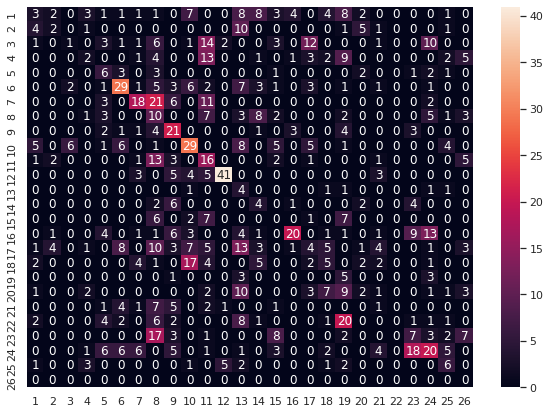

In [ ]:
# Generating confusion matrix
df_cm = pd.DataFrame(A, index = [i for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]],
                  columns = [i for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

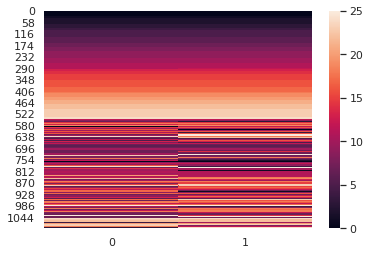

In [ ]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
# uniform_data = np.random.rand(10, 12)
data = np.array([y_true,y_pred])
data = data.reshape(1100,2)
sns.heatmap(data)